#HW7


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

In [522]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.3
WORLD_SIZE = [5,10]
SWAMPS = [[0,i]for i in range(10)]
S0 = [1, 0]
ST = [1, 9]
planning_times = 10
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

OBSTACLES = [[1, 3], [2, 3], [3, 3], [2, 6], [3, 6], [4, 6]]

In [523]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [524]:
def step(state, action):
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  if state_n in OBSTACLES:
    state_n = list(state)
  if state_n in SWAMPS:
    reward = -100
  else:
    reward = -1
  
  return [state_n, reward]

In [525]:
import random # for choice function use in Python built-in

def dyna_q():
  qtable = np.zeros([5,10,4])
  model = {}
  returns = []
  for episode in range(1000):
    # your code here #
    state = S0
    G = 0
    while state != ST:
      action = chooseAction(state, qtable, EPSILON)
      next_state, reward = step(state, ACTIONS[action])
      oldEstimate = qtable[state[0], state[1], action]
      qtable[state[0], state[1], action] += ALPHA * (reward + GAMMA * max(qtable[next_state[0], next_state[1]]) - oldEstimate)
      # model.append((state, action, reward, next_state))
      model[(tuple(state), action)] = (reward, next_state)
      # print(model)
      state = next_state
      G += GAMMA * reward
      for _ in range(planning_times):
        s_a_pair = list(model.keys())
        # print(s_a_pair)
        sample = random.choice(s_a_pair)
        # print(sample)
        action_at_s = []
        s = sample[0]
        for item in s_a_pair:
          if item[0] == s:
            action_at_s.append(item[1])
        a = random.choice(action_at_s)
        r, n_state = model[s, a]
   
        # s, a = sample[0], sample[1]
        # model_s_a = list(filter(lambda x: x[0] == s and x[1] == a, model))
        # print(model_s_a)
        # r, n_state = model[idx][2], model[idx][3]
        # print(r)
        # r, n_state = model_s_a[0][2], model_s_a[0][3]
        oldEstimate = qtable[s[0], s[1], a]
        qtable[s[0], s[1], a] += ALPHA * (r + GAMMA * max(qtable[n_state[0], n_state[1]]) - oldEstimate)
    returns.append(G)
    ##########################

  return returns

In [526]:
def q_learning():
  qtable = np.zeros([5,10,4])
  returns = []
  for episode in range(1000):
    # your code here #
    state = S0
    G = 0
    while state != ST:
      
      ######## YOUR CODE HERE ########
      action = chooseAction(state, qtable, EPSILON)
      next_state, reward = step(state, ACTIONS[action])
      oldEstimate = qtable[state[0], state[1], action]
      update_val = ALPHA * (reward + GAMMA * max(qtable[next_state[0], next_state[1]]) - oldEstimate)
      qtable[state[0], state[1], action] += update_val
      state = next_state
      G += GAMMA * reward
      # print(qtable)
      ####################################
      
    returns.append(G)
    
    ##########################
  return returns

In [527]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

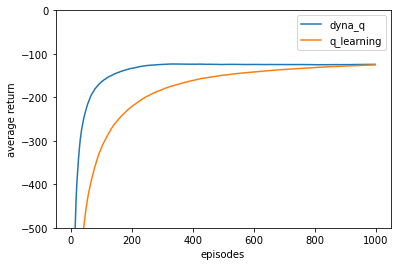

In [528]:
plt.plot(np.average([averages(dyna_q()) for i in range(30)],axis=0),label='dyna_q')
plt.plot(np.average([averages(q_learning()) for i in range(30)],axis=0),label='q_learning')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()